In [1]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Creación de gráficos
import matplotlib.pyplot as plt
from time import time
# Herramientas de SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Nuevo
from sklearn.metrics import confusion_matrix

In [2]:
# Leer el set de datos y consultar información básica
df = pd.read_csv('digitos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
# Consultar los primeros registros del set de datos
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:>

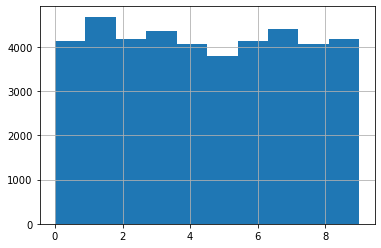

In [4]:
df['label'].hist()

In [6]:
# Obtener una sección del DataFrame usando los números de columna
pixeles = df.iloc[:,1:785] # x
digitos = df.iloc[:,0:1] # y

In [8]:
# Separar datos para entrenar y para probar
X_train, X_test, y_train, y_test = train_test_split(
    pixeles,
    digitos,
    test_size=0.5
)

In [9]:
# Consultar información de la muestra de entrenamiento
X_train.shape

(21000, 784)

In [10]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def mostrar_num(in_data):
    """Genera un gráfico que muestra un registro
    del set de datos.
    Para ello, convierte el array de 1 dimensión en
    una matriz de 28x28.
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28, 28))

In [12]:
X_test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


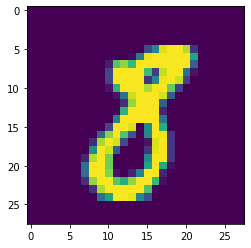

In [13]:
mostrar_num(X_test.iloc[3])

In [43]:
# Creación del modelo
modelo = SVC(kernel='linear')

In [44]:
# Entrenamiento
hora_inicio = time()
modelo.fit(X_train.values, y_train.values.ravel())
print('Entrenamiento terminado en {}'.format(time() - hora_inicio))

Entrenamiento terminado en 59.5637469291687


In [45]:
# Crear predicción de datos
hora_inicio = time()
y_pred = modelo.predict(X_test.values)
print('Predicción terminada en {}'.format(time() - hora_inicio))
print(y_pred.shape)

Predicción terminada en 97.29079246520996
(21000,)


In [46]:
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision}')

Precisión: 0.9697619047619047


El resultado era: label    7
Name: 21656, dtype: int64
El dígito es: [7]


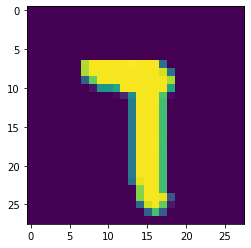

In [47]:
prueba = X_test.iloc[1100]
print(f'El resultado era: {y_test.iloc[1100]}')
mostrar_num(prueba)
prediccion = modelo.predict([prueba])
print(f'El dígito es: {prediccion}')

In [39]:
# Prueba con la matriz de confusión
conf = confusion_matrix(y_test, y_pred)

In [40]:
conf

array([[2036,    0,   12,    4,    5,   15,   13,    0,    8,    2],
       [   0, 2250,   12,    5,    3,    4,    0,    8,   18,    0],
       [  13,   23, 1908,   46,   26,   10,   15,   20,   36,    6],
       [  17,   12,   51, 1958,    3,   67,    4,   21,   49,   13],
       [  10,    7,   14,    2, 1929,    0,   14,   10,    2,   65],
       [  35,   16,   24,  112,   17, 1603,   23,    3,   29,   15],
       [  17,    7,   31,    1,   19,   33, 1951,    0,    6,    0],
       [   6,    7,   34,   13,   27,    4,    0, 2019,    7,   97],
       [  12,   55,   61,  102,   12,   64,    9,   11, 1656,   10],
       [  15,   10,   19,   21,   93,   12,    0,  107,   20, 1809]],
      dtype=int64)

In [41]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

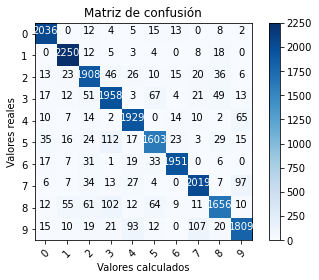

In [42]:
plot_cm(conf, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])